In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns
import missingno as msno
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
data_set = pd.read_csv('Iris.csv')

In [ ]:
data_set.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data_set['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
data_set.drop('Id', inplace = True, axis =1)

In [ ]:
data_set

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
data_set.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<AxesSubplot:>

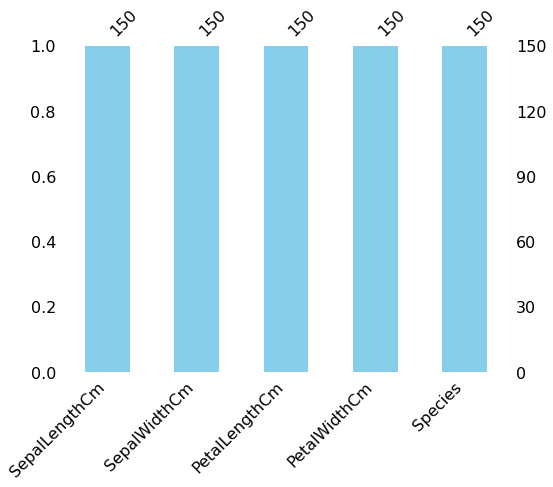

In [ ]:
msno.bar(data_set,figsize=(8,6),color='skyblue')

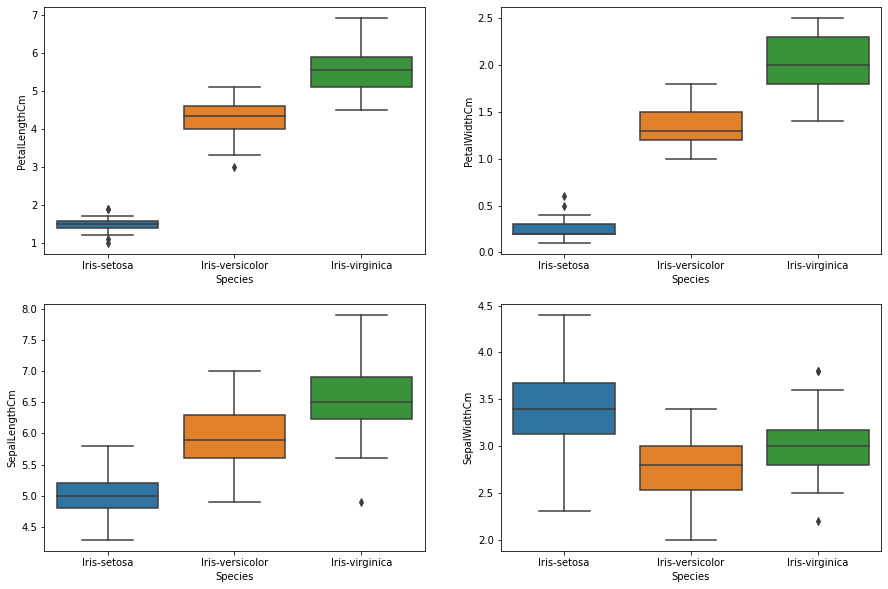

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x= 'Species',y='PetalLengthCm', data=data_set)
plt.subplot(2,2,2)
sns.boxplot(x='Species',y='PetalWidthCm',data=data_set)
plt.subplot(2,2,3)
sns.boxplot(x= 'Species',y='SepalLengthCm', data=data_set)
plt.subplot(2,2,4)
sns.boxplot(x='Species',y='SepalWidthCm', data=data_set) 
plt.show()

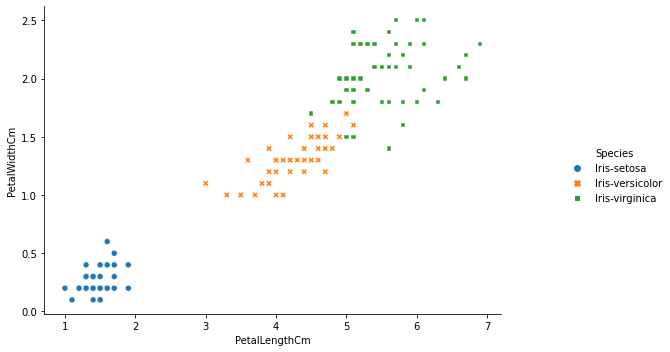

In [ ]:
g=sns.relplot(x='PetalLengthCm',y='PetalWidthCm', data=data_set, hue='Species', style= 'Species') 
g.fig.set_size_inches(10,5) 
plt.show()

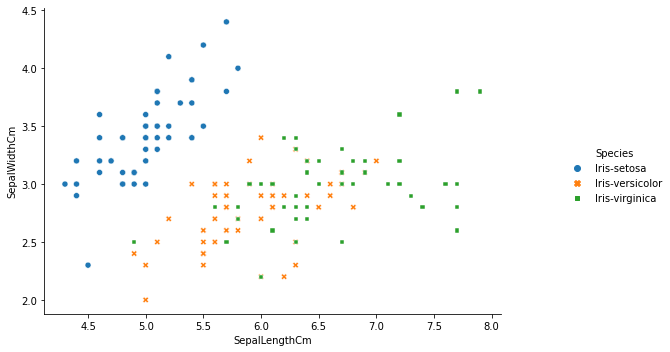

In [ ]:
g=sns.relplot(x='SepalLengthCm',y='SepalWidthCm', data=data_set, hue='Species', style='Species') 
g.fig.set_size_inches(10,5) 
plt.show()

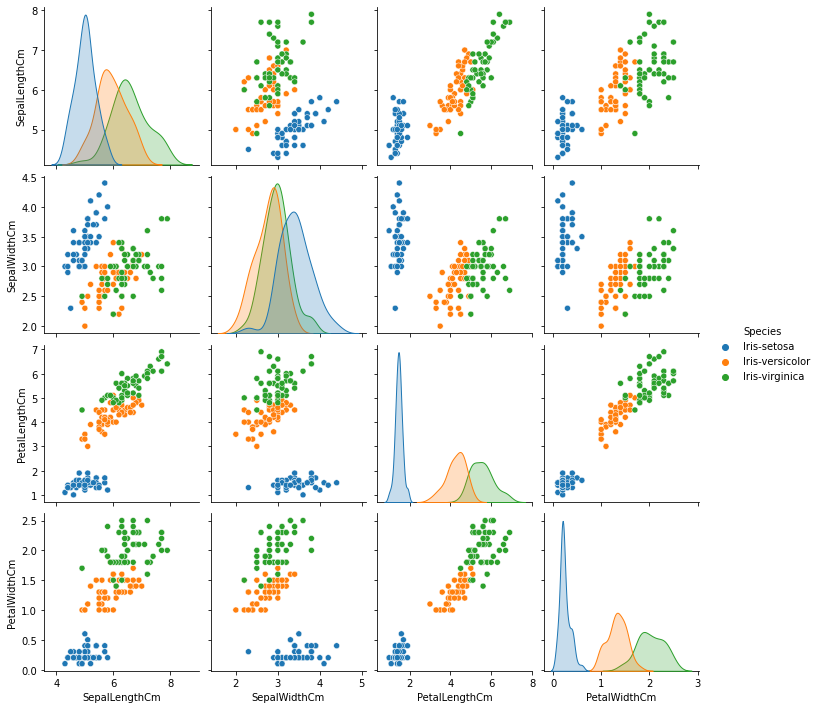

In [ ]:
sns.pairplot(data_set, hue="Species")
plt.show()

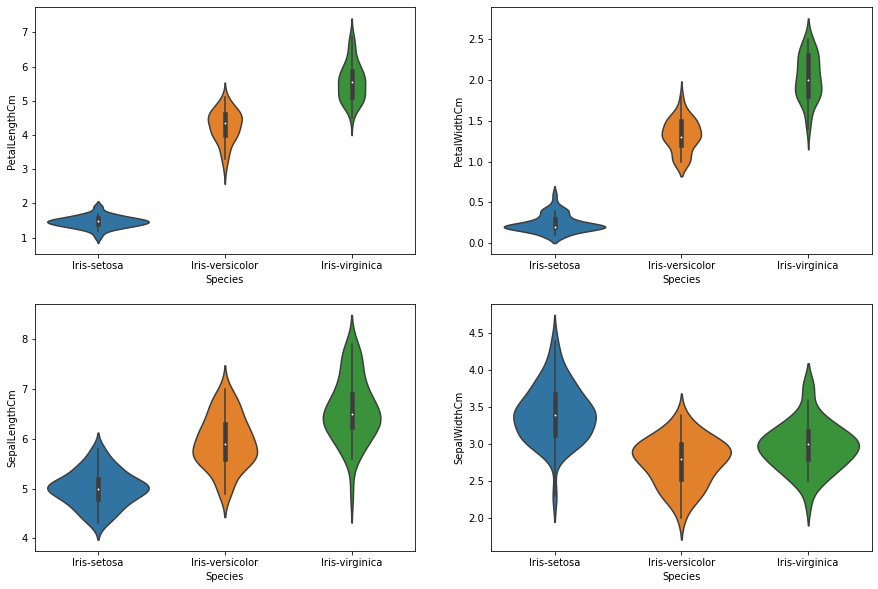

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=data_set)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=data_set)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm', data=data_set)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=data_set)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


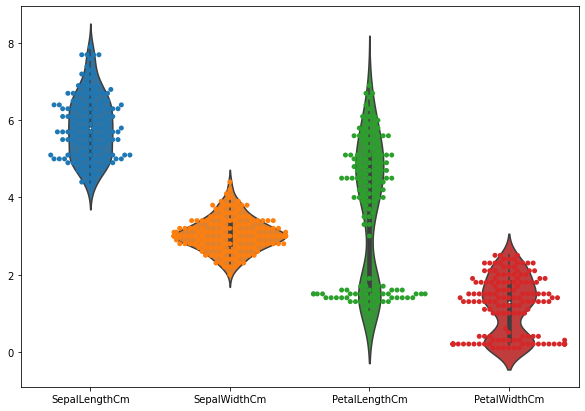

In [ ]:
plt.subplots(figsize=(10,7)) 
sns.violinplot(data=data_set) 
sns.swarmplot(data=data_set) 
plt.show()

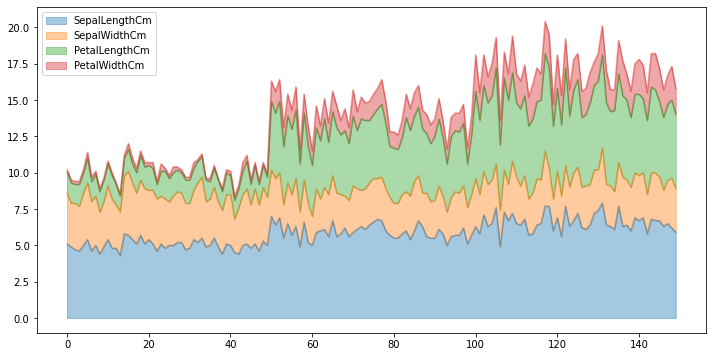

In [ ]:
data_set.plot.area(y=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],alpha=0.4,figsize=(12,6));

In [ ]:
x = data_set.iloc[:,:-1].values
y = data_set.iloc[:,4].values

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder_y= LabelEncoder()
y= label_encoder_y.fit_transform(y)

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size= 0.3, random_state=0)

In [ ]:
from sklearn.naive_bayes import GaussianNB 
classifier1 = GaussianNB()
classifier1.fit(x_train, y_train)

GaussianNB()

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier2= MultinomialNB()
classifier2.fit(x_train, y_train)

MultinomialNB()

In [ ]:
from sklearn.naive_bayes import BernoulliNB 
classifier3 = BernoulliNB()
classifier3.fit(x_train, y_train)

BernoulliNB()

In [ ]:
y_pred1 = classifier1.predict(x_test) 
y_pred2=classifier2.predict(x_test)
y_pred3 = classifier3.predict(x_test)

In [ ]:
y_pred1

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0])

In [ ]:
y_pred2

array([2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2,
       0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0,
       0])

In [ ]:
y_pred3

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2])

In [ ]:
from sklearn.metrics import accuracy_score 
print('accuracy score for GaussianNB')
print (accuracy_score (y_test, classifier1.predict(x_test))) 
print('accuracy score for multinomialNB')
print (accuracy_score (y_test, classifier2.predict(x_test))) 
print('accuracy score for BernoulliNB')
print(accuracy_score(y_test, classifier3.predict(x_test)))

accuracy score for GaussianNB
1.0
accuracy score for multinomialNB
0.6
accuracy score for BernoulliNB
0.24444444444444444


In [ ]:
from sklearn.metrics import confusion_matrix 
cm1 = confusion_matrix(y_test, y_pred1) 
cm3 = confusion_matrix(y_test, y_pred3)
cm2 = confusion_matrix(y_test, y_pred2)

In [ ]:
cm1

array([[16,  0,  0],
       [ 0, 18,  0],
       [ 0,  0, 11]])

In [ ]:
cm2

array([[16,  0,  0],
       [ 0,  0, 18],
       [ 0,  0, 11]])

In [ ]:
cm3

array([[ 0,  0, 16],
       [ 0,  0, 18],
       [ 0,  0, 11]])

In [ ]:
from sklearn.metrics import classification_report 
print('for gaussianNB') 
print(classification_report (y_test, y_pred1))

for gaussianNB
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        11

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
print('accuracy: %.3f' % accuracy_score (y_test, y_pred1)) 
print('Precision: %.3f' % precision_score (y_test, y_pred1, average='micro')) 
print('Precision: %.3f' % recall_score (y_test, y_pred1, average='micro')) 
print('Precision: %.3f' % f1_score (y_test, y_pred1, average='micro'))

accuracy: 1.000
Precision: 1.000
Precision: 1.000
Precision: 1.000


In [ ]:
x_train2, x_test2, y_train2, y_test2= train_test_split(x, y, test_size= 0.2, random_state=0)
from sklearn.naive_bayes import GaussianNB 
classifier = GaussianNB() 
classifier.fit(x_train2, y_train2) 
y_pred = classifier.predict(x_test2)

In [ ]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [ ]:
print('accuracy score for GaussianNB classifier with less testing data') 
print(accuracy_score (y_test2, classifier.predict(x_test2)))

accuracy score for GaussianNB classifier with less testing data
0.9666666666666667
